In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
def get_prices(tickers_list, start, end, what_price):
    
    df = pd.DataFrame()
    for ticker in tickers_list:
        tmp = data.DataReader(ticker, 'yahoo', start, end)
        df[ticker] = tmp[what_price]
    return df 

def is_first_friday(date):
    
    if date.weekday() == 4 and date.day <= 7:
        return 1
    else:
        return 0
        
    

In [4]:
tickers = ['SPY', 'TLT', 'JNK', 'IYR', 'FXE', 'GSG']
st = dt.datetime(2011, 1, 1)
ed = dt.datetime(2016, 1, 1)

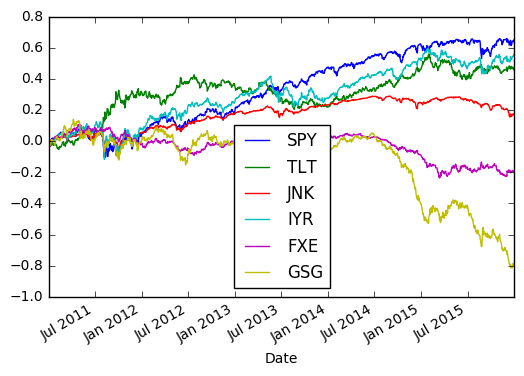

In [5]:
prices = get_prices(tickers, st, ed, 'Adj Close')
# Is pct_change good enough? Maybe make it ln(x2/x1)?
returns = prices.pct_change(1).dropna()
returns.cumsum().plot()
plt.show()

In [6]:
horizon = [1, 2, 3, 5, 10, 20] #, 40, 60, 120, 250]
Scores = pd.DataFrame(index=tickers, columns =[str(x)+' days' for x in horizon])

In [ ]:
in_ = True
for tick in tickers:
    
    for n_fwd in horizon:

            x_base = prices.pct_change(n_fwd).dropna()
            xl1 = x_base.shift(1); xl1 = xl1.add_prefix('Lag1_')
            x_base['WeekDay'] = x_base.index.weekday_name;   x_base = pd.get_dummies(x_base)
            x_base['Month'] = x_base.index.strftime('%b');   x_base = pd.get_dummies(x_base)
            x = x_base.join(xl1).dropna().iloc[:-n_fwd]
            x['First_Friday'] = pd.Series(x.index, index=x.index).apply(is_first_friday)

            y = x_base[tick].shift(-n_fwd).iloc[1:-n_fwd]
            y = np.where(y>=0, 1, 0)

            X_train, X_test, y_train, y_test = train_test_split(x, y, 
                    train_size = 0.7, random_state = 0)

            ##### added pipeline #### 
            mlp = MLPClassifier()
            
            pipe_mlp = Pipeline([('scl', StandardScaler()),
                         ('clf', mlp)])

            #param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
            param_range = [0.01, 10.0]

            param_grid = [{'clf__alpha'     : param_range, # regularization strength on L2
                           'clf__activation': ['relu'], #,'logistic', 'tanh'],
                           'clf__solver'    : ['sgd'],
                           'clf__hidden_layer_sizes' : [(100,100), (100,100,100)]}] # 'lbfgs','adam'

            gs = GridSearchCV(estimator = pipe_mlp,
                              param_grid = param_grid,
                              scoring='accuracy',
                              cv = 3,
                              n_jobs = -1)

            gs = gs.fit(X_train, y_train)

            best_mlp = gs.best_estimator_
            best_mlp.fit(X_train, y_train)

            train_score = best_mlp.score(X_train, y_train)
            test_score  = best_mlp.score(X_test, y_test)

        #        train_score = f1_score(y_train, best_mlp.predict(X_train) ) 
        #        test_score  = f1_score(y_test , best_mlp.predict(X_test)  )


            if in_:
                print('Ticker, Base%, TrainScore, TestScore, next_days_forward ')
                print(tick,',%.3f, %.3f, %.3f, %.f' % (y.sum()/len(y), train_score, test_score, n_fwd)) 
                in_ = False
            else:
                print(tick,',%.3f, %.3f, %.3f, %.f' % (y.sum()/len(y), train_score, test_score, n_fwd))        

D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Ticker, Base%, TrainScore, TestScore, next_days_forward 
SPY ,0.551, 0.560, 0.531, 1


D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


SPY ,0.577, 0.563, 0.609, 2


D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


SPY ,0.590, 0.561, 0.657, 3


D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


SPY ,0.593, 0.697, 0.597, 5


D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
D:\Python3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


SPY ,0.616, 0.704, 0.656, 10
